In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [13]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/기획경영_전처리/사업기획.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,디지털광고 상품DSP 등 전략 수립 및 기획 고객행동 데이터 분석 및 분석서비스 ...,데이터 기반 솔루션 전략 수립 및 기획 5년 이상 경력이 있는 분 서비스 기획 또...
1,성장 포인트에 대해 알려드려요하나 기획자로서 거래소라는 복잡한 Application...,3년 이상의 경력자 0to1을 해보셨거나 하고자 하는 강한 의지가 있으신 분 가설...
2,전기차 충전 사업 개발 및 관리충전 및 에너지 신사업 기획제안 B2B 프로젝트 관리,경력 경력무관신입가능3개월 시용기간직급 매니저전기차 충전 사업 개발 및 관리충전 ...
3,전기차 충전 사업 사업개발Project Management 조직 리드 전국 단위 ...,전기 시설 관련 시공 프로젝트 관리 경험 5년 이상 보유하신 분 시공 파트너사 협...
4,사업관리기술기획IT 개발 역량,학력 대졸이상경력 경력10년이상석사학위 수여자박사학위 수여자관련학과 전공자관련 ...
...,...,...
142,쿡앱스에서 앞으로 담당하실 업무예요 쿡앱스 사업지원팀에서 팀배틀 RPG 장르의 프...,이에요 사업 PM 업무 5년 이상이신 분 사업 전략에 따라 주요 KPI를 설정하고 ...
143,사업기획 사업전략 및 사업계획 수립 대외협력국내외 관련업체 IR 홍보...,전장업체 경력자 전자컴퓨터정보통신 관련 전공자 시장과 기술에 대한 이해도가 높은 ...
144,치과시장 동향 분석 서비스 전략 수립 및 신규 사업 발굴 플랫폼 사업 운영 및 서...,영어 회화 능통 대학교 졸업 이상 관련 경력 3년 이상 치과 또는 의료 산업의 이...
145,다큐브의 제휴 담당자는 B2B 솔루션에 대한 높은 이해도를 바탕으로 국내 기업용 솔...,제휴사업 경력 5년10년 또는 그에 준하는 역량을 보유하신 분 제휴 업무에 대한 ...


In [14]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,데이터 기반 솔루션 전략 수립 및 기획 5년 이상 경력이 있는 분 서비스 기획 또...
1,3년 이상의 경력자 0to1을 해보셨거나 하고자 하는 강한 의지가 있으신 분 가설...
2,경력 경력무관신입가능3개월 시용기간직급 매니저전기차 충전 사업 개발 및 관리충전 ...
3,전기 시설 관련 시공 프로젝트 관리 경험 5년 이상 보유하신 분 시공 파트너사 협...
4,학력 대졸이상경력 경력10년이상석사학위 수여자박사학위 수여자관련학과 전공자관련 ...
...,...
142,이에요 사업 PM 업무 5년 이상이신 분 사업 전략에 따라 주요 KPI를 설정하고 ...
143,전장업체 경력자 전자컴퓨터정보통신 관련 전공자 시장과 기술에 대한 이해도가 높은 ...
144,영어 회화 능통 대학교 졸업 이상 관련 경력 3년 이상 치과 또는 의료 산업의 이...
145,제휴사업 경력 5년10년 또는 그에 준하는 역량을 보유하신 분 제휴 업무에 대한 ...


In [15]:
#txt로 저장
i = 'C:/Users/User/Desktop/기획경영_전처리/사업기획(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [16]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n 데이터 기반 솔루션 전략 수립 및 기획 5년 이상 경력이 있는 분 서비스 기획 또는 POPM 경력 5년 이상 혹은 이에 준하는 실력을 갖춘 분 원활한 커뮤니케이션 능력을 보유한 분 담당 업무를 명시한 포트폴리오를 제출한 분 산업공학 통계학 데이터 관련 학위 또는 이에 준하는 지식을 보유한 분 DataDriven 사고를 바탕으로 문제를 파악하고 해결하는 역량을 갖춘 분 RTB 광고 도메인AD Network에 대한 이해 또는 경험이 있는 분 마케팅 지표에 대한 이해도가 있는 분 AWS GAGTM 컨설팅 및 운영 경험이 있는 분\n 3년 이상의 경력자 0to1을 해보셨거나 하고자 하는 강한 의지가 있으신 분 가설검증 사이클을 린하게 돌려본 경험이 있으신 분 프로덕트 단계마다 데이터를 이해해가며 방향성을 유기적으로 제안할 수 있는 분 UX에 대해 높은 가치를 두고 있는 분 주도성 오너십을 가지고 업무를 이끌어 나가실 수 있는 분 새로운 걸 배우는데 두려움이 없고 폭발적으로 성장할 준비가 된 분 다른 팀원과 적극적으로 대화할 수 있는 의사소통 능력이 있으신 분 Web3와 DeFi의 철학에 공감하시거나 관심있으신 분 금융수학에 대한 관심이나 지식이 있는 분 주식크립토 트레이딩 경험이 있으신 분 글로벌 고객과 소통할 수 있는 분\n경력 경력무관신입가능3개월 시용기간직급  매니저전기차 충전 사업 개발 및 관리충전 및 에너지 신사업 기획제안 B2B 프로젝트 관리전기차 충전 및 에너지 관련 업무 경험이 있으신 분관련학과를 전공하셨거나 해당 분야 이해도 및 관련 지식을 보유하신 분문서작성과 통계분석이 능숙하신 분외국어 사용이 가능하신 분\n 전기 시설 관련 시공 프로젝트 관리 경험 5년 이상 보유하신 분 시공 파트너사 협업 및 관리 경험을 보유하신 분 문제해결에 흥미를 가지고 적극적으로 개선하는 성향을 보유하신 분 동료 간 수평적인 구조를 중시하고 의견을 표현하는데 주저함이 없으며 다양한 팀과의 협업을 위한 커뮤니케이션이 원활하신 분 5인 이상 조직에서

In [17]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '데이터',
 '기반',
 '솔루션',
 '전략',
 '수립',
 '및',
 '기획',
 '이상',
 '경력',
 '분',
 '서비스',
 '기획',
 '경력',
 '이상',
 '이',
 '준',
 '실력',
 '분',
 '커뮤니케이션',
 '능력',
 '보유',
 '분',
 '담당',
 '업무',
 '명시',
 '포트폴리오',
 '제출',
 '분',
 '산업',
 '공학',
 '통계학',
 '데이터',
 '관련',
 '학위',
 '이',
 '준',
 '지식',
 '보유',
 '분',
 '사고',
 '바탕',
 '문제',
 '파악',
 '해결',
 '역량',
 '분',
 '광고',
 '도메인',
 '대한',
 '이해',
 '경험',
 '분',
 '마케팅',
 '지표',
 '대한',
 '이해도',
 '분',
 '컨설팅',
 '및',
 '운영',
 '경험',
 '분',
 '이상',
 '경력',
 '의지',
 '분',
 '가설검증',
 '사이클',
 '린',
 '경험',
 '분',
 '프로',
 '덕트',
 '단계',
 '데이터',
 '이해해',
 '방향성',
 '유기',
 '제안',
 '수',
 '분',
 '대해',
 '가치',
 '분',
 '주도',
 '십',
 '가지',
 '업무',
 '수',
 '분',
 '걸',
 '두려움',
 '폭발',
 '준비',
 '분',
 '다른',
 '팀',
 '적극',
 '대화',
 '수',
 '의사소통',
 '능력',
 '분',
 '의',
 '철학',
 '공감',
 '관심',
 '분',
 '금융',
 '수학',
 '대한',
 '관심',
 '지식',
 '분',
 '주식',
 '크립',
 '토',
 '트레이딩',
 '경험',
 '분',
 '글로벌',
 '고객',
 '소통',
 '수',
 '분',
 '경력',
 '경력',
 '무관',
 '신입',
 '가능',
 '개월',
 '용기',
 '직급',
 '매니저',
 '전기차',
 '충전',
 '사업',
 '개발',
 '및',


In [18]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

7771
936


FreqDist({'분': 599, '경험': 374, '및': 180, '경력': 180, '보유': 164, '관련': 153, '이상': 143, '사업': 140, '업무': 119, '등': 117, ...})

In [19]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [30]:
stop_words = [
    
    '주도','서비스','활용','스타트업','역량','사업','우대','이해도','보유','업무','대한','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '경험', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '사항',
 '데이터',
 '솔루션',
 '전략',
 '수립',
 '기획',
 '기획',
 '이',
 '준',
 '실력',
 '커뮤니케이션',
 '담당',
 '명시',
 '포트폴리오',
 '제출',
 '산업',
 '공학',
 '통계학',
 '데이터',
 '학위',
 '이',
 '준',
 '지식',
 '사고',
 '바탕',
 '파악',
 '광고',
 '도메인',
 '이해',
 '마케팅',
 '지표',
 '컨설팅',
 '운영',
 '의지',
 '가설검증',
 '사이클',
 '린',
 '프로',
 '덕트',
 '단계',
 '데이터',
 '이해해',
 '방향성',
 '유기',
 '제안',
 '대해',
 '가치',
 '십',
 '가지',
 '걸',
 '두려움',
 '폭발',
 '준비',
 '다른',
 '적극',
 '대화',
 '의사소통',
 '의',
 '철학',
 '공감',
 '금융',
 '수학',
 '지식',
 '주식',
 '크립',
 '토',
 '트레이딩',
 '글로벌',
 '고객',
 '소통',
 '무관',
 '신입',
 '가능',
 '개월',
 '용기',
 '직급',
 '매니저',
 '전기차',
 '충전',
 '개발',
 '충전',
 '에너지',
 '기획',
 '제안',
 '프로젝트',
 '전기차',
 '충전',
 '에너지',
 '학과',
 '전공',
 '해당',
 '분야',
 '지식',
 '문서',
 '통계',
 '분석',
 '외국어',
 '사용',
 '전기',
 '시설',
 '시공',
 '프로젝트',
 '시공',
 '파트너',
 '사',
 '협업',
 '문제해결',
 '흥미',
 '가지',
 '적극',
 '개선',
 '성향',
 '동료',
 '간',
 '수평',
 '구조',
 '중시',
 '의견',
 '표현',
 '함',
 '협업',
 '커뮤니케이션',
 '인',
 '조직',
 '조직',
 '인력',
 '미션',
 '구성원',
 '피드백',
 '리더',
 '시도',
 '실패',
 '도전',
 '성격',
 '전기차',
 '충전기',


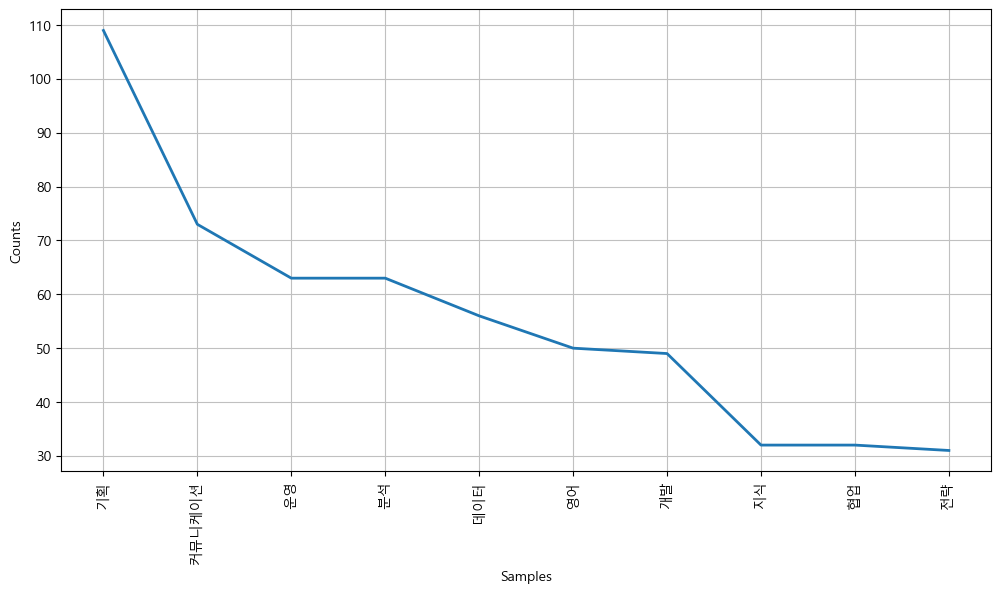

In [31]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

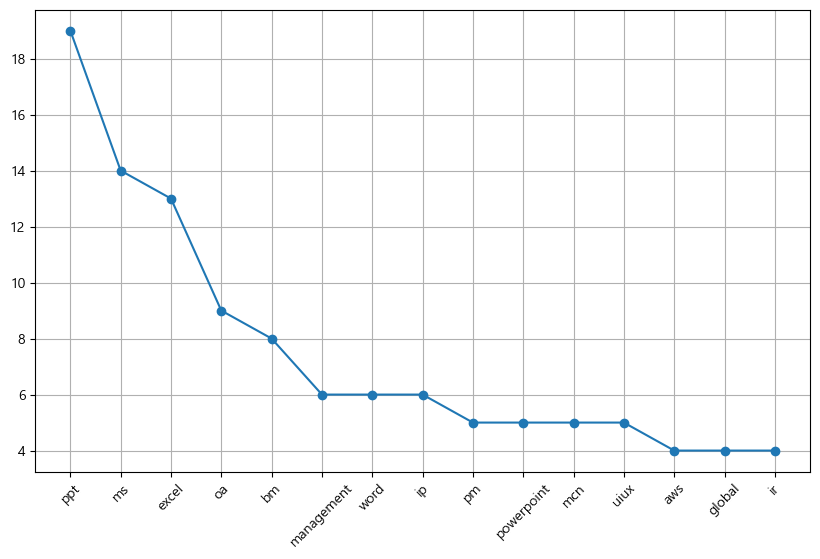

In [32]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)